# Wykrywanie Halucynacji

<img src="https://live.staticflickr.com/65535/54208132682_73767c3560_b.jpg" alt="Embedded Photo" width="500">

## Wstęp

Modele językowe pomagają nam w codziennych zadaniach, takich jak poprawianie tekstów, pisanie kodu czy odpowiadanie na pytania. 
Są one również coraz częściej wykorzystywane w takich dziedzinach jak medycyna czy edukacja.
Skąd możemy jednak wiedzieć, kiedy odpowiedzi, które generują, są poprawne? 
Czasem modele zaczynają odpowiadać, nawet gdy nie znają odpowiedzi, a ich odpowiedzi brzmią wiarygodnie, mimo że wprowadzają w błąd. Takie błędne odpowiedzi nazywamy halucynacjami.

## Zadanie

W tym zadaniu zmierzysz się z wykrywaniem halucynacji w odpowiedziach na pytania faktograficzne generowane przez duże modele językowe (LLM).
Przeanalizujesz zbiór danych, który pomoże w ocenie, czy odpowiedzi generowane przez model językowy są faktycznie poprawne, czy zawierają halucynacje.

Każdy przykład w zbiorze danych zawiera:

- **Pytanie** np. "Jaka jest główna odpowiedzialność Departamentu Obrony USA?"
- **Odpowiedź modelu językowego** np. "Główną odpowiedzialnością jest obrona kraju."
- **Tokeny** związane z generacją odpowiedzi.
- **Cztery alternatywne odpowiedzi** wygenerowane z przez ten sam model z większą temperaturą.
- **Tokeny alternatywnych odpowiedzi** wygenerowane z przez ten sam model z większą temperaturą.
- **Prawdopodobieństwa alternatywnych odpowiedzi** wygenerowane z przez ten sam model z większą temperaturą.
- **Etykietę (`is_correct`)** wskazującą, czy główna odpowiedź jest poprawna według zaufanego źródła.

```json
[
    {
        "question_id": 34,
        "question": "What is the name of the low-cost carrier that operates as a wholly owned subsidiary of Singapore Airlines?",
        "answer": "Scoot is the low-cost carrier that operates as a wholly owned subsidiary of Singapore Airlines.",
        "tokens": [" Sco", "ot", " is", ..., " Airlines", ".", "\n"],
        "supporting_answers": [
            "As a wholly owned subsidiary of Singapore Airlines, <answer> Scoot </answer> stands as a low-cost carrier that revolutionized air travel in the region.",
            "Scoot, a subsidiary of <answer> Singapore Airlines </answer> , is the low-cost carrier that operates under the same brand.",
            "<answer> Scoot </answer> is the low-cost carrier that operates as a wholly owned subsidiary of Singapore Airlines.",
            "Singapore Airlines operates a low-cost subsidiary named <answer> Scoot </answer> , offering affordable and efficient air travel options to passengers."
        ],
        "supporting_tokens": [
            [" As", " a", ..., ".", "<answer>"],
            [" Sco", "ot", ..., " brand", ".", "\n"],
            ["<answer>", " Sco", ..., ".", "\n"],
            [" Singapore", " Airlines", ..., ".", "\n"]
        ],
        "supporting_probabilities": [
            [0.0029233775567263365, 0.8621460795402527, ..., 0.018515007570385933],
            [0.42073577642440796, 0.9999748468399048, ..., 0.9166142344474792],
            [0.3258324861526489, 0.9969879984855652, ..., 0.921079695224762],
            [0.11142394691705704, 0.960810661315918, ..., 0.9557166695594788]
        ],
        "is_correct": true
    },
    .
    .
    .
]
```

## Ograniczenia

* Twoje finalne rozwiązanie będzie testowane w środowisku z GPU.
* Twoje rozwiazanie bedzie testowane bez dostepu do internetu.
* Twój notebook, licząc z treningiem modelu na danych traningowych lub przygotowaniem algorytmu oraz predykcją na danych walidacyjnych lub testowych powienien kończyć swoje działanie w ciągu 5 minut.
* Lista dopuszczalnych bibliotek: `xgboost`, `scikit-learn`, `numpy`.

## Dane

Dane dostępne dla Ciebie w tym zadaniu to:

* `train.json` - zbiór danych zawierający 2967 pytań oraz odpowiedzi.
* `valid.json` - 990 dodatkowych pytań.


## Uwagi i wskazówki




## Pliki Zgłoszeniowe

Tylko ten notebook.

## Ewaluacja

ROC AUC (ang. *Receiver Operating Characteristic Area Under Curve*) to miara jakości klasyfikatora binarnego. Pokazuje zdolność modelu do odróżniania między dwiema klasami - tutaj halucynacją (false) i poprawną odpowiedzią (true). 

- **ROC (Receiver Operating Characteristic)**: Wykres pokazujący zależność między *True Positive Rate* (czułość) a *False Positive Rate* (1-specyficzność) przy różnych progach decyzyjnych.
- **AUC (Area Under Curve)**: Pole pod wykresem ROC, które przyjmuje wartości od 0 do 1:
  - **1.0**: Model perfekcyjny.
  - **0.5**: Model losowy (brak zdolności do odróżniania klas).

Im wyższa wartość AUC, tym lepiej model radzi sobie z klasyfikacją.

Za to zadanie możesz zdobyć pomiędzy 0.0 i 1.0 punktu. Wynik będzie skalowany liniowo w zależności od wartości ROC AUC:

- **ROC AUC ≤ 0.6**: 0 punktów.
- **ROC AUC ≥ 0.8**: 1 punkt.
- **Wartości pomiędzy 0.6 a 0.8**: skalowane liniowo.

Wzór na wynik:  
$$
\text{Punkty} = 
\begin{cases} 
0 & \text{dla } \text{ROC AUC} \leq 0.6 \\
\frac{\text{ROC AUC} - 0.6}{0.8 - 0.6} & \text{dla } 0.6 < \text{ROC AUC} < 0.8 \\
1 & \text{dla } \text{ROC AUC} \geq 0.8
\end{cases}
$$


# Kod startowy

In [ ]:
######################### NIE ZMIENIAJ TEJ KOMÓRKI ##########################

FINAL_EVALUATION_MODE = False  # W czasie sprawdzania twojego rozwiązania, zmienimy tą wartość na True


import os
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import xgboost as xgb
import sklearn as sk
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score, balanced_accuracy_score
from sklearn.dummy import DummyClassifier

from utils import download_data, load_data, extract_targets, LeafInlineEncoder

# Pobierz dane tylko jeśli nie jesteś w trybie FINAL_EVALUATION_MODE
if not FINAL_EVALUATION_MODE:
    download_data()

ModuleNotFoundError: No module named 'utils'

In [3]:
######################### NIE ZMIENIAJ TEJ KOMÓRKI ##########################

train, valid = load_data("data")

print(json.dumps(train[0], indent=2, cls=LeafInlineEncoder))

print(f"\nTotal training samples: {len(train)}")
print(f"Total validation samples: {len(valid)}")

{
  "question_id": 2147,
  "question": "What is the name of the American multinational toy manufacturing and entertainment company founded in 1945?",
  "answer": "With a rich history spanning decades, the name of the American multinational toy manufacturing and entertainment company founded in 1945 is Hasbro .",
  "tokens": [" With", " a", " rich", " history", " spanning", " decades", ",", " the", " name", " of", " the", " American", " multinational", " toy", " manufacturing", " and", " entertainment", " company", " founded", " in", " ", "1", "9", "4", "5", " is", " Hasbro", ".", "\n"],
  "supporting_answers": [
    "The iconic American toy manufacturing and entertainment company, known for its beloved characters, is <answer> Hasbro </answer> .",
    "Mattel, the American multinational toy manufacturing and entertainment company, was founded by <answer> Ruth Handler </answer> in 1945.",
    "With a rich history and a global presence, <answer> Hasbro </answer> is the name of the America

## Twoje rozwiązanie
To jest jedyna sekcja, w której musisz coś zrobić.

### Hallucination Detection Pipeline: All-In-One Notebook

This notebook demonstrates the full workflow for our hallucination detection task:
1. **Data Loading**  
2. **Feature Extraction** (statistical, semantic, cross-answer consistency, style, question-type)
3. **Feature Aggregation**  
4. **Model Training** using XGBoost  
5. **Evaluation** on a validation set

We combine all scripts and classes into one place for a quick, self-contained demo.


In [4]:
import re
import os
import json
import pickle
import numpy as np
import datetime
import joblib
from difflib import SequenceMatcher
from collections import Counter
from typing import List, Optional

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

from xgboost import XGBClassifier
from sklearn.metrics import roc_auc_score


#### 1. Data Loading

In [5]:
class DataLoader:
    """
    Handles loading of dataset splits from disk.
    """

    def __init__(self, base_path: str = "./data"):
        """
        :param base_path: Path to the directory containing train/valid/test subdirectories.
        """
        self.base_path = base_path

    def load_split(self, split: str = "train"):
        """
        Loads the specified data split (train/valid/test).

        :param split: "train", "valid", or "test"
        :return: A list of data samples (each sample is likely a dict).
        """
        file_path = os.path.join(self.base_path, f"{split}.json")
        if not os.path.exists(file_path):
            raise FileNotFoundError(f"Data file not found: {file_path}")
        with open(file_path, "r", encoding="utf-8") as f:
            data = json.load(f)
        return data


#### 2. Feature Extraction

##### 2.1 StatisticalFeatureExtractor
The **StatisticalFeatureExtractor** computes a set of statistical metrics based on the token probabilities of each supporting answer. These heuristics aim to capture the underlying confidence and variability in the model's token predictions, which can be indicative of answer reliability. 

**Key Features Extracted:**
- **Minimum Token Probability (`mtp`)**: The lowest probability assigned to any token in the answer, indicating potential uncertainty.
- **Average Token Probability (`avgtp`)**: The mean probability across all tokens, representing overall confidence.
- **Maximum Probability Deviation (`mpd`)**: The difference between the highest and lowest token probabilities, measuring variability.
- **Minimum Probability Spread (`mps`)**: Similar to `mpd`, it assesses the spread of token probabilities.
- **Generalized Negative Log-Likelihood (`g_nll`)**: Aggregates the log probabilities to gauge the overall likelihood of the answer.
- **Variance of Token Probabilities (`var_prob`)**: Captures the dispersion of probabilities, highlighting inconsistencies.

These features are extracted both for the entire supporting answer and specifically for the tokens enclosed within `<answer>...</answer>` tags, focusing on the key entities or phrases.


In [6]:
class StatisticalFeatureExtractor:
    """
    Extracts statistical features such as minimum/average token probability,
    generalized negative log-likelihood, variance of probabilities, etc.
    """

    def __init__(self):
        pass

    def extract_features(self, sample: dict) -> dict:
        """
        Computes and returns a dictionary of statistical features for a single data sample.
        """
        features = {}

        supporting_probabilities = sample.get("supporting_probabilities", [])
        for idx, probs in enumerate(supporting_probabilities):
            probs_array = np.array(probs)

            features[f'[stats] mtp_{idx}'] = np.min(probs_array)
            features[f'[stats] avgtp_{idx}'] = np.mean(probs_array)
            # For consistency, we interpret MPD and MPS similarly:
            # MPD = max(probabilities) - min(probabilities)
            # MPS = same, or a variant measure
            mpd = np.max(probs_array) - np.min(probs_array)
            features[f'[stats] mpd_{idx}'] = mpd
            features[f'[stats] mps_{idx}'] = mpd  # If we treat them identically, or adapt to your approach
            # Generalized NLL
            features[f'[stats] g_nll_{idx}'] = -np.sum(np.log(probs_array + 1e-12)) / len(probs_array)
            # Variance
            features[f'[stats] var_prob_{idx}'] = np.var(probs_array)

        return features

##### 2.2 SemanticFeatureExtractor
The **SemanticFeatureExtractor** focuses on capturing the semantic relationships and overlaps between the main answer, the question, and the supporting answers. By leveraging natural language processing techniques, it quantifies the textual similarity and coherence across these components.

**Key Features Extracted:**
- **Bag-of-Words Overlap (`bow_unique_ratio`)**: Measures the ratio of unique words in the supporting answers' `<answer>` sections to the total number of words, indicating lexical diversity.
- **TF-IDF Average (`tfidf_avg`)**: Computes the average TF-IDF scores of the extracted answers, reflecting their importance within the corpus.
- **Question-Answer Cosine Similarity (`qa_cosine_similarity`)**: Evaluates the cosine similarity between the TF-IDF vectors of the question and the main answer, assessing their semantic alignment.

These features encourage the detection of semantic consistency and relevance between the main content and the supporting evidence, promoting more accurate hallucination detection.


In [7]:
class DataLoaderForSemantic:  # A helper if needed for auto-fitting
    def __init__(self, base_path: str = "./data"):
        self.base_path = base_path

    def load_split(self, split: str = "train"):
        file_path = os.path.join(self.base_path, f"{split}.json")
        if not os.path.exists(file_path):
            raise FileNotFoundError(f"Data file not found: {file_path}")
        with open(file_path, "r", encoding="utf-8") as f:
            data = json.load(f)
        return data

class SemanticFeatureExtractor:
    """
    Extracts semantic features:
    - Bag-of-words overlap among <answer> tags
    - TF-IDF-based similarity
    - Question-answer cosine similarity
    """

    def __init__(self,
                 vectorizer: Optional[TfidfVectorizer] = None,
                 base_data_path: str = "./data"):
        """
        If no vectorizer is provided, we load and fit on the entire train set automatically.
        """
        if vectorizer is None:
            # Build a corpus from the train set
            loader = DataLoaderForSemantic(base_path=base_data_path)
            train_samples = loader.load_split("train")
            corpus = self._build_corpus_from_data(train_samples)
            self.vectorizer = self.fit_vectorizer(corpus)
            self.is_fitted = True
        else:
            self.vectorizer = vectorizer
            self.is_fitted = True

    @classmethod
    def fit_vectorizer(cls, corpus: List[str]) -> TfidfVectorizer:
        vectorizer = TfidfVectorizer()
        vectorizer.fit(corpus)
        return vectorizer

    def _build_corpus_from_data(self, data_samples: List[dict]) -> List[str]:
        corpus = []
        for sample in data_samples:
            corpus.append(self._preprocess_text(sample.get("question", "")))
            corpus.append(self._preprocess_text(sample.get("answer", "")))
            for sup_ans in sample.get("supporting_answers", []):
                corpus.append(self._preprocess_text(sup_ans))
        return corpus

    def _extract_answer_contents(self, supporting_answers: List[str]) -> List[str]:
        extracted = []
        for ans in supporting_answers:
            matches = re.findall(r"<answer>(.*?)</answer>", ans, re.IGNORECASE | re.DOTALL)
            extracted.extend(matches)
        return extracted

    def _preprocess_text(self, text: str) -> str:
        text = text.lower()
        text = re.sub(r'[^\w\s]', '', text)
        return text.strip()

    def extract_features(self, sample: dict) -> dict:
        features = {}

        supporting_answers = sample.get("supporting_answers", [])
        extracted_answers = self._extract_answer_contents(supporting_answers)
        preprocessed_answers = [self._preprocess_text(ans) for ans in extracted_answers]

        # Bag-of-words Overlap
        all_words = ' '.join(preprocessed_answers).split()
        word_counts = Counter(all_words)
        unique_words = len(word_counts)
        total_words = len(all_words)
        features['[sem]   bow_unique_ratio'] = unique_words / total_words if total_words > 0 else 0

        if preprocessed_answers and self.is_fitted:
            tfidf_matrix = self.vectorizer.transform(preprocessed_answers)
            avg_tfidf = tfidf_matrix.mean(axis=0).A1
            features['[sem]   tfidf_avg'] = float(avg_tfidf.mean())
        else:
            features['[sem]   tfidf_avg'] = 0.0

        # Question-Answer similarity
        question = self._preprocess_text(sample.get("question", ""))
        main_answer = self._preprocess_text(sample.get("answer", ""))
        combined_corpus = [question, main_answer]
        if self.is_fitted:
            tfidf_q_a = self.vectorizer.transform(combined_corpus)
            similarity = cosine_similarity(tfidf_q_a[0:1], tfidf_q_a[1:2])[0][0]
            features['[sem]   qa_cosine_similarity'] = float(similarity)
        else:
            features['[sem]   qa_cosine_similarity'] = 0.0

        return features

##### 2.3 CrossAnswerConsistencyExtractor
The **CrossAnswerConsistencyExtractor** assesses the agreement and consistency among the supporting answers. By analyzing the content within the `<answer>...</answer>` tags across multiple supporting answers, it identifies patterns that may indicate the reliability or uncertainty of the main answer.

**Key Features Extracted:**
- **Number of Unique Answers (`num_unique_answers`)**: Counts how many distinct answers are present among the supporting answers, where higher diversity may signal uncertainty.
- **Most Common Answer Count (`most_common_answer_count`)**: Determines the frequency of the most repeated answer, reflecting consensus.
- **Agreement Ratio (`agreement_ratio`)**: Calculates the proportion of supporting answers that agree with the most common answer, highlighting the level of consensus.

These features help in identifying whether the supporting answers converge on a single answer or present conflicting information, which is crucial for detecting potential hallucinations.


In [8]:
class CrossAnswerConsistencyExtractor:
    """
    Extracts features indicating the consistency among supporting answers.
    """

    def __init__(self):
        pass

    def _extract_answer_contents(self, supporting_answers: list) -> list:
        extracted = []
        for ans in supporting_answers:
            matches = re.findall(r"<answer>(.*?)</answer>", ans, re.IGNORECASE | re.DOTALL)
            extracted.extend(matches)
        return extracted

    def extract_features(self, sample: dict) -> dict:
        features = {}
        supporting_answers = sample.get("supporting_answers", [])
        extracted_answers = self._extract_answer_contents(supporting_answers)

        answer_counts = Counter(extracted_answers)
        num_unique_answers = len(answer_counts)
        features['[cross] num_unique_answers'] = num_unique_answers

        if answer_counts:
            most_common_count = answer_counts.most_common(1)[0][1]
        else:
            most_common_count = 0
        features['[cross] most_common_answer_count'] = most_common_count

        total_supporting = len(supporting_answers)
        agreement_ratio = most_common_count / total_supporting if total_supporting > 0 else 0
        features['[cross] agreement_ratio'] = agreement_ratio

        return features

##### 2.4 StyleFeatureExtractor
The **StyleFeatureExtractor** captures stylistic and structural attributes of the main answer and its supporting counterparts. By analyzing sentence structures and lexical similarities, it provides insights into the coherence and consistency of the responses.

**Key Features Extracted:**
- **Sentence Length Variance (`sentence_length_variance`)**: Measures the variability in the lengths of sentences within the main and supporting answers, indicating stylistic consistency.
- **Average Sentence Length (`average_sentence_length`)**: Computes the mean number of words per sentence, reflecting the complexity and verbosity of the answers.
- **Average Longest Common Subsequence (`average_lcs`)**: Calculates the average length of the longest common subsequence between the main answer and each supporting answer, assessing lexical similarity.

These features are instrumental in evaluating the stylistic coherence between answers, ensuring that responses maintain a consistent narrative structure.


In [9]:
class StyleFeatureExtractor:
    """
    Computes style-based features: sentence length variance,
    average sentence length, average LCS to supporting answers.
    """

    def __init__(self):
        pass

    def _split_into_sentences(self, text: str) -> List[str]:
        sentences = re.split(r'[.!?]+', text)
        return [s.strip() for s in sentences if s.strip()]

    def _compute_lcs(self, str1: str, str2: str) -> int:
        matcher = SequenceMatcher(None, str1, str2)
        match = matcher.find_longest_match(0, len(str1), 0, len(str2))
        return match.size

    def extract_features(self, sample: dict) -> dict:
        features = {}
        main_answer = sample.get("answer", "")
        supporting_answers = sample.get("supporting_answers", [])

        main_sentences = self._split_into_sentences(main_answer)
        if not main_sentences:
            main_sentences = [main_answer]

        # We'll also gather supporting sentences to combine them for variance
        supporting_sentences = []
        for supp_ans in supporting_answers:
            supporting_sentences.extend(self._split_into_sentences(supp_ans))

        all_sentences = main_sentences + supporting_sentences
        sentence_lengths = [len(s.split()) for s in all_sentences]

        if len(sentence_lengths) > 1:
            var_len = float(np.var(sentence_lengths))
            avg_len = float(np.mean(sentence_lengths))
        elif len(sentence_lengths) == 1:
            var_len = 0.0
            avg_len = float(sentence_lengths[0])
        else:
            var_len = 0.0
            avg_len = 0.0

        features['[style] sentence_length_variance'] = var_len
        features['[style] average_sentence_length'] = avg_len

        # Average LCS between main answer and supporting answers
        lcs_lengths = []
        for supp_ans in supporting_answers:
            lcs_length = self._compute_lcs(main_answer, supp_ans)
            lcs_lengths.append(lcs_length)

        if lcs_lengths:
            features['[style] average_lcs'] = float(np.mean(lcs_lengths))
        else:
            features['[style] average_lcs'] = 0.0

        return features

##### 2.5 QuestionTypeFeatureExtractor
The **QuestionTypeFeatureExtractor** identifies the type of question based on its leading words. By categorizing questions into types such as Who, What, Where, When, Why, How, and Which, it provides contextual information that can influence the nature of the expected answer.

**Key Features Extracted:**
- **One-Hot Encoded Features**: 
  - `is_who`: Indicates if the question pertains to a person.
  - `is_what`: Denotes questions seeking definitions or descriptions.
  - `is_where`: Identifies location-based questions.
  - `is_when`: Flags time-related inquiries.
  - `is_why`: Captures questions seeking reasons or explanations.
  - `is_how`: Marks questions about processes or methods.
  - `is_which`: Highlights questions requiring selection among options.

These binary features serve as additional signals for the classifier, enabling it to tailor its predictions based on the inherent nature of the question, thereby enhancing the accuracy of hallucination detection.


In [10]:
class QuestionTypeFeatureExtractor:
    """
    Extracts question-type indicators using simple heuristics on the question text.
    Produces one-hot features for: who, what, where, when, why, how, which.
    """

    def __init__(self):
        self.patterns = {
            '[type]  is_who': re.compile(r'^\s*who\b', re.IGNORECASE),
            '[type]  is_what': re.compile(r'^\s*what\b', re.IGNORECASE),
            '[type]  is_where': re.compile(r'^\s*where\b', re.IGNORECASE),
            '[type]  is_when': re.compile(r'^\s*when\b', re.IGNORECASE),
            '[type]  is_why': re.compile(r'^\s*why\b', re.IGNORECASE),
            '[type]  is_how': re.compile(r'^\s*how\b', re.IGNORECASE),
            '[type]  is_which': re.compile(r'^\s*which\b', re.IGNORECASE)
        }

    def extract_features(self, sample: dict) -> dict:
        features = {
            '[type]  is_who': 0,
            '[type]  is_what': 0,
            '[type]  is_where': 0,
            '[type]  is_when': 0,
            '[type]  is_why': 0,
            '[type]  is_how': 0,
            '[type]  is_which': 0
        }

        question = sample.get("question", "").strip().lower()
        # Check which pattern matches the start of the question:
        for feat_name, pattern in self.patterns.items():
            if pattern.match(question):
                features[feat_name] = 1
                break

        return features


##### **2.6 AnswerProbabilityFeatureExtractor**

This feature extractor leverages the token-level probabilities within the `<answer>...</answer>` tags found in each supporting answer. Its goal is to quantify the model's confidence regarding the answer content and to assess how consistently the generated answer tokens align with the main answer. Specifically, it performs the following steps:

1. **`find_answer_probability()`**:  
   Locates the tokens between `<answer>` and `</answer>` in a single supporting answer and calculates the mean probability of these tokens.

2. **`generate_answer_probabilities()`**:  
   Applies the above function across all supporting answers and segregates the results into two sets:
   - **“Answer” probabilities**: When the extracted `<answer>` text is found within the main answer, indicating consistency.
   - **“Other” probabilities**: When the extracted text is absent from the main answer, suggesting possible divergence.

3. **Statistical Aggregation**:  
   Computes a range of statistical metrics for each of the two sets of probabilities, including:
   - **Minimum, Mean, Maximum, Standard Deviation, and Count** for the “answer” probabilities, reported as:  
     `answer_min`, `answer_mean`, `answer_max`, `answer_std`, and `answer_len`.
   - The same set of metrics for the “other” probabilities, reported as:  
     `other_min`, `other_mean`, `other_max`, `other_std`, and `other_len`.

4. **Per-Supporting Answer Statistics**:  
   Additionally, for each of the four supporting answers, the extractor calculates quick summary statistics (min, mean, max, standard deviation, and length of the probability array) and reports them under keys like:  
   `supporting_proba_0_min`, `supporting_proba_0_mean`, ..., up to `supporting_proba_3_*`.

These features capture not only the model’s confidence in the generated answer segments but also how well these segments align with the main answer, along with the overall variability in token probabilities across supporting answers.

In [11]:
class AnswerProbabilityFeatureExtractor:
    """
    Extracts specialized features by analyzing the <answer>...</answer> tokens
    in each supporting answer, focusing on their probabilities, alignment with
    the main answer, and statistical summaries.
    """

    def __init__(self):
        pass

    def _find_token_idx(self, token: str, tokens: list) -> int:
        """
        Returns the first index in 'tokens' that matches 'token', or -1 if not found.
        """
        for i, t in enumerate(tokens):
            if t == token:
                return i
        return -1

    def _find_answer_probability(self, tokens: list, probabilities: list) -> (float, str):
        """
        Finds the mean probability of all tokens between <answer> and </answer> in
        'tokens', returning (mean_probability, joined_text).
        """
        idx_start = self._find_token_idx('<answer>', tokens)
        idx_end = self._find_token_idx('</answer>', tokens)

        # If out of order, swap them.
        if idx_end < idx_start:
            idx_start, idx_end = idx_end, idx_start

        # Extract probabilities for tokens strictly between <answer> and </answer>
        # (exclude the tags themselves)
        segment_probs = probabilities[idx_start+1:idx_end]
        segment_text_tokens = tokens[idx_start+1:idx_end]

        mean_prob = np.mean(segment_probs) if len(segment_probs) > 0 else 0.0
        joined_text = ''.join(segment_text_tokens)  # e.g. "MountEverest" etc.
        return (mean_prob, joined_text)

    def _generate_answer_probabilities(self, sample: dict):
        """
        For each supporting answer, computes the mean probability of tokens in <answer>...</answer>.
        Classifies them as 'answer' if that text is found in the main answer, else 'other'.
        """
        answer_probs = []
        other_probs = []

        supporting_answers = sample.get('supporting_answers', [])
        supporting_tokens = sample.get('supporting_tokens', [])
        supporting_probabilities = sample.get('supporting_probabilities', [])

        main_ans_text = sample.get('answer', '')

        for i in range(len(supporting_answers)):
            tokens_i = supporting_tokens[i]
            probs_i = supporting_probabilities[i]

            mean_prob, extracted_text = self._find_answer_probability(tokens_i, probs_i)

            # If the text is contained in the main answer, it's 'answer', else 'other'
            if extracted_text and extracted_text in main_ans_text:
                answer_probs.append(mean_prob)
            else:
                other_probs.append(mean_prob)

        return answer_probs, other_probs

    def extract_features(self, sample: dict) -> dict:
        """
        Public method to be called by aggregator. Returns a dict of features
        capturing the confidence inside <answer>...</answer> segments, plus
        summary stats for each of the four supporting answers.
        """
        features = {}

        # 1. Gather probabilities for 'answer' vs 'other'
        answer_probs, other_probs = self._generate_answer_probabilities(sample)
        a_len = len(answer_probs)
        o_len = len(other_probs)

        features['[ansprob] answer_min'] = float(np.min(answer_probs)) if a_len else 0.0
        features['[ansprob] answer_mean'] = float(np.mean(answer_probs)) if a_len else 0.0
        features['[ansprob] answer_max'] = float(np.max(answer_probs)) if a_len else 0.0
        features['[ansprob] answer_std'] = float(np.std(answer_probs)) if a_len else 0.0
        features['[ansprob] answer_len'] = a_len

        features['[ansprob] other_min'] = float(np.min(other_probs)) if o_len else 0.0
        features['[ansprob] other_mean'] = float(np.mean(other_probs)) if o_len else 0.0
        features['[ansprob] other_max'] = float(np.max(other_probs)) if o_len else 0.0
        features['[ansprob] other_std'] = float(np.std(other_probs)) if o_len else 0.0
        features['[ansprob] other_len'] = o_len

        # 2. For each of the four supporting answers, gather summary stats
        supporting_probs = sample.get('supporting_probabilities', [])
        for i in range(4):
            if i < len(supporting_probs):
                arr = np.array(supporting_probs[i])
                features[f'[ansprob] supporting_proba_{i}_min'] = float(arr.min())
                features[f'[ansprob] supporting_proba_{i}_mean'] = float(arr.mean())
                features[f'[ansprob] supporting_proba_{i}_max'] = float(arr.max())
                features[f'[ansprob] supporting_proba_{i}_std'] = float(arr.std())
                features[f'[ansprob] supporting_proba_{i}_len'] = arr.size
            else:
                # If fewer than 4 supporting answers in the sample, fill with 0
                features[f'[ansprob] supporting_proba_{i}_min'] = 0.0
                features[f'[ansprob] supporting_proba_{i}_mean'] = 0.0
                features[f'[ansprob] supporting_proba_{i}_max'] = 0.0
                features[f'[ansprob] supporting_proba_{i}_std'] = 0.0
                features[f'[ansprob] supporting_proba_{i}_len'] = 0

        return features

#### 3. Feature Aggregator

In [12]:
class FeatureAggregator:
    """
    Orchestrates the extraction of all feature sets and merges them into
    one consolidated feature dictionary.
    """

    def __init__(self, base_data_path: str = "./data"):
        """
        Instantiate all needed feature extractors.
        """
        self.extractors = {
            "statistical": StatisticalFeatureExtractor(),
            "semantic": SemanticFeatureExtractor(base_data_path=base_data_path),
            "cross_answer_consistency": CrossAnswerConsistencyExtractor(),
            "style": StyleFeatureExtractor(),
            "question_type": QuestionTypeFeatureExtractor(),
            "answer_probability": AnswerProbabilityFeatureExtractor()
        }

    def aggregate_features(self, sample: dict, feature_sets="all") -> dict:
        """
        Calls the relevant feature extractors on a sample.
        If 'feature_sets' is "all", use all extractors; otherwise, a list subset.
        """
        consolidated_features = {}

        if feature_sets == "all":
            selected_extractors = self.extractors.values()
        elif isinstance(feature_sets, list):
            selected_extractors = [self.extractors[name]
                                   for name in feature_sets
                                   if name in self.extractors]
        else:
            raise ValueError("feature_sets must be 'all' or a list of feature set names.")

        for extractor in selected_extractors:
            feats = extractor.extract_features(sample)
            consolidated_features.update(feats)

        return consolidated_features

#### 4. Evaluator

In [13]:
class Evaluator:
    """
    Evaluates a trained XGB model on a given dataset (e.g., validation).
    """

    def __init__(self, feature_aggregator: FeatureAggregator, model_dir="./models"):
        self.feature_aggregator = feature_aggregator
        self.model_dir = model_dir
        self.model = None

    def evaluate(self, data, model_path=None, feature_sets="all"):
        """
        Evaluates the model on the given data. By default, uses the latest saved model
        if model_path is None. Returns an AUC score.
        """
        model = self._load_model(model_path)
        if model is None:
            print("[Evaluator] No model to evaluate.")
            return 0.0

        X = []
        y = []
        for sample in data:
            feats = self.feature_aggregator.aggregate_features(sample, feature_sets)
            X.append(list(feats.values()))
            y.append(int(sample.get("is_correct", 0)))

        preds_proba = model.predict_proba(X)[:, 1]
        auc_score_val = roc_auc_score(y, preds_proba)
        return auc_score_val

    def _load_model(self, model_path=None):
        if model_path is None:
            # Find the most recently saved model
            files = os.listdir(self.model_dir)
            pkl_files = [f for f in files if f.endswith('.pkl')]
            if not pkl_files:
                print("[Evaluator] No .pkl model files in the directory.")
                return None
            pkl_files.sort(key=lambda x: os.path.getmtime(os.path.join(self.model_dir, x)), reverse=True)
            model_path = os.path.join(self.model_dir, pkl_files[0])

        self.model = joblib.load(model_path)
        print(f"[Evaluator] Loaded model from {model_path}")
        return self.model


#### 5. Trainer

In [35]:
import os
import datetime
import joblib
import numpy as np

from sklearn.metrics import roc_auc_score
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV

from xgboost import XGBClassifier

class Trainer:
    """
    Trains either:
    1) an XGBoost model (when do_grid_search=False),
    2) or runs a GridSearchCV on a GradientBoostingClassifier (when do_grid_search=True).

    The final model is stored in 'self.model' and can be saved/loaded.
    """

    def __init__(self, feature_aggregator, model_dir="./models"):
        """
        :param feature_aggregator: Instance of FeatureAggregator.
        :param model_dir: Directory path where models are saved.
        """
        self.feature_aggregator = feature_aggregator
        self.model_dir = model_dir
        os.makedirs(self.model_dir, exist_ok=True)  # Ensure model directory exists
        self.model = None

    def train(self, train_data, valid_data, feature_sets="all", verbose=True, do_grid_search=False):
        """
        :param train_data: List of data samples (dicts) for training.
        :param valid_data: List of data samples (dicts) for validation.
        :param feature_sets: "all" or list of feature set names for aggregator.
        :param verbose: If True, prints progress & final AUCs.
        :param do_grid_search: If True, runs GridSearchCV on GradientBoostingClassifier.
                              If False, trains XGBClassifier with fixed hyperparams + early stopping.
        """
        X_train, y_train = self._prepare_data(train_data, feature_sets)
        X_valid, y_valid = self._prepare_data(valid_data, feature_sets)

        if do_grid_search:
            # GridSearch over GradientBoostingClassifier
            # param_grid = {
            #     'n_estimators': [50, 100, 300, 500],
            #     'learning_rate': [0.01, 0.03],
            #     'max_depth': [1, 3, 5, 7],
            #     'min_samples_split': [5, 15],
            #     'min_samples_leaf': [2, 4],
            #     'subsample': [0.2, 0.5, 1.0],
            #     'validation_fraction': [0.1],
            #     'n_iter_no_change': [10],
            #     'tol': [1e-4]
            # }
            param_grid = {
                'n_estimators': [50, 300, 500, 1000],
                'learning_rate': [0.01, 0.03, 0.05],
                'max_depth': [1, 3, 5, 7],
                'min_samples_split': [5, 10, 15],
                'min_samples_leaf': [1, 2, 4],
                'subsample': [0.2, 0.5, 0.8, 1.0],
                'validation_fraction': [0.1],
                'n_iter_no_change': [10, 20],
                'tol': [1e-4, 1e-3]
            }


            base_model = GradientBoostingClassifier(
                random_state=42,
                verbose=0
            )
            grid_search = GridSearchCV(
                estimator=base_model,
                param_grid=param_grid,
                cv=3,
                scoring='roc_auc',
                n_jobs=-1,
                verbose=5 if verbose else 0
            )

            grid_search.fit(X_train, y_train)
            best_params = grid_search.best_params_
            if verbose:
                print(f"\n[Trainer] Best params from Grid Search: {best_params}\n")

            self.model = GradientBoostingClassifier(
                **best_params,
                random_state=42,
                verbose=0
            )
            self.model.fit(X_train, y_train)
        else:
            # Use XGB with fixed hyperparameters & early stopping
            self.model = XGBClassifier(
                n_estimators=300,
                learning_rate=0.03,
                max_depth=3,
                min_child_weight=4,
                subsample=0.5,
                colsample_bytree=0.8,
                reg_alpha=0.1,
                reg_lambda=1,
                gamma=0,
                objective='binary:logistic',
                eval_metric='auc',
                early_stopping_rounds=10,
                verbosity=1
            )
            self.model.fit(
                X_train, y_train,
                eval_set=[(X_valid, y_valid)],
                verbose=verbose
            )

        # Evaluate
        if verbose:
            # Training AUC
            preds_train = self.model.predict_proba(X_train)[:, 1]
            auc_train = roc_auc_score(y_train, preds_train)
            print(f"[Trainer] Training AUC: {auc_train:.4f}")

            # Validation AUC
            preds_valid = self.model.predict_proba(X_valid)[:, 1]
            auc_valid = roc_auc_score(y_valid, preds_valid)
            print(f"[Trainer] Validation AUC: {auc_valid:.4f}")

    def _prepare_data(self, dataset, feature_sets="all"):
        """
        Convert each sample into (X, y).
        """
        X, y = [], []
        for sample in dataset:
            feats = self.feature_aggregator.aggregate_features(sample, feature_sets)
            X.append(list(feats.values()))
            y.append(int(sample.get('is_correct', 0)))
        return np.array(X), np.array(y)

    def save_model(self, model_name="model"):
        if self.model is None:
            print("[Trainer] No model to save.")
            return
        timestamp = datetime.datetime.now().strftime("%Y_%m_%d__%H_%M_%S")
        filename = f"{model_name}_{timestamp}.pkl"
        filepath = os.path.join(self.model_dir, filename)
        joblib.dump(self.model, filepath)
        print(f"[Trainer] Model saved to {filepath}")

    def load_model(self, model_path=None):
        if model_path is None:
            files = os.listdir(self.model_dir)
            pkl_files = [f for f in files if f.endswith('.pkl')]
            if not pkl_files:
                print("[Trainer] No .pkl files in model directory.")
                return None
            pkl_files.sort(key=lambda f: os.path.getmtime(os.path.join(self.model_dir, f)), reverse=True)
            model_path = os.path.join(self.model_dir, pkl_files[0])

        self.model = joblib.load(model_path)
        print(f"[Trainer] Loaded model from {model_path}")
        return self.model


#### 6. Demo Usage: Training & Evaluation

##### 1) Load data

In [15]:
data_base_path = "./data"
model_directory = "./models"

# Load the data
loader = DataLoader(base_path=data_base_path)
train_data = loader.load_split("train")
valid_data = loader.load_split("valid")

##### 2) Train a model with all features

In [36]:
# Initialize the FeatureAggregator
aggregator = FeatureAggregator(base_data_path=data_base_path)

# Initialize and train the model on all features
trainer = Trainer(feature_aggregator=aggregator, model_dir=model_directory)
trainer.train(train_data, valid_data, feature_sets="all", verbose=True, do_grid_search=True)
trainer.save_model("xgb_model_all_features")

Fitting 3 folds for each of 6912 candidates, totalling 20736 fits
[CV 3/3] END learning_rate=0.01, max_depth=1, min_samples_leaf=1, min_samples_split=5, n_estimators=50, n_iter_no_change=10, subsample=0.2, tol=0.0001, validation_fraction=0.1;, score=0.806 total time=   0.1s
[CV 2/3] END learning_rate=0.01, max_depth=1, min_samples_leaf=1, min_samples_split=5, n_estimators=50, n_iter_no_change=10, subsample=0.2, tol=0.001, validation_fraction=0.1;, score=0.749 total time=   0.1s
[CV 2/3] END learning_rate=0.01, max_depth=1, min_samples_leaf=1, min_samples_split=5, n_estimators=50, n_iter_no_change=10, subsample=0.2, tol=0.0001, validation_fraction=0.1;, score=0.749 total time=   0.1s
[CV 1/3] END learning_rate=0.01, max_depth=1, min_samples_leaf=1, min_samples_split=5, n_estimators=50, n_iter_no_change=10, subsample=0.2, tol=0.001, validation_fraction=0.1;, score=0.794 total time=   0.1s[CV 1/3] END learning_rate=0.01, max_depth=1, min_samples_leaf=1, min_samples_split=5, n_estimators=5

In [27]:
# Initialize the FeatureAggregator
aggregator = FeatureAggregator(base_data_path=data_base_path)

# Initialize and train the model on all features
trainer = Trainer(feature_aggregator=aggregator, model_dir=model_directory)
trainer.train(train_data, valid_data, feature_sets="all", verbose=True, do_grid_search=False)
trainer.save_model("xgb_model_all_features")

[0]	validation_0-auc:0.78158
[1]	validation_0-auc:0.80404
[2]	validation_0-auc:0.80801
[3]	validation_0-auc:0.80815
[4]	validation_0-auc:0.80514
[5]	validation_0-auc:0.80930
[6]	validation_0-auc:0.80724
[7]	validation_0-auc:0.80673
[8]	validation_0-auc:0.80908
[9]	validation_0-auc:0.80949
[10]	validation_0-auc:0.81129
[11]	validation_0-auc:0.81336
[12]	validation_0-auc:0.81343
[13]	validation_0-auc:0.81554
[14]	validation_0-auc:0.81472
[15]	validation_0-auc:0.81506
[16]	validation_0-auc:0.81711
[17]	validation_0-auc:0.81759
[18]	validation_0-auc:0.81822
[19]	validation_0-auc:0.81980
[20]	validation_0-auc:0.81979
[21]	validation_0-auc:0.81988
[22]	validation_0-auc:0.82077
[23]	validation_0-auc:0.82148
[24]	validation_0-auc:0.82071
[25]	validation_0-auc:0.82180
[26]	validation_0-auc:0.82161
[27]	validation_0-auc:0.82245
[28]	validation_0-auc:0.82254
[29]	validation_0-auc:0.82263
[30]	validation_0-auc:0.82203
[31]	validation_0-auc:0.82185
[32]	validation_0-auc:0.82169
[33]	validation_0-au

##### 3) Evaluate it

In [21]:
# Evaluate
if not FINAL_EVALUATION_MODE:
    evaluator = Evaluator(feature_aggregator=aggregator, model_dir=model_directory)
    auc_score = evaluator.evaluate(valid_data, feature_sets="all")
    print(f"[Notebook] Validation AUC (All Features): {auc_score:.4f}")

[Evaluator] Loaded model from ./models/xgb_model_all_features_2025_02_16__16_32_48.pkl
[Notebook] Validation AUC (All Features): 0.8260


In [25]:
def predict_hallucinations(sample):
    """
    Predicts the probability that the given sample is a hallucination.
    
    :param sample: A dictionary representing a single data sample.
    :return: Probability of the sample being a hallucination (float between 0 and 1).
    """
    # Aggregate features using the FeatureAggregator
    features = aggregator.aggregate_features(sample, feature_sets="all")
    
    # Prepare the feature vector for prediction
    X = [list(features.values())]
    
    # Get prediction probabilities from the trained XGBoost model
    probs = trainer.model.predict_proba(X)
    
    # Assuming the first column corresponds to 'is_correct' = False (hallucination)
    hallucination_prob = probs[0][0]
    
    return 1-hallucination_prob

#### 7. (Additional) Feature Subset Analysis

In this section, we perform a detailed feature subset analysis by training and evaluating multiple models with different combinations of features. Specifically, we train:

1. **Five models using only one feature set each**:
   - `ONLY_statistical`: Model trained with only statistical features.
   - `ONLY_semantic`: Model trained with only semantic features.
   - `ONLY_cross_answer_consistency`: Model trained with only cross-answer consistency features.
   - `ONLY_style`: Model trained with only style features.
   - `ONLY_question_type`: Model trained with only question-type features.

2. **Five models excluding one feature set each**:
   - `NO_statistical`: Model trained with all features except statistical features.
   - `NO_semantic`: Model trained with all features except semantic features.
   - `NO_cross_answer_consistency`: Model trained with all features except cross-answer consistency features.
   - `NO_style`: Model trained with all features except style features.
   - `NO_question_type`: Model trained with all features except question-type features.

3. **A model using all features**:
   - `ALL_FEATURES`: A comprehensive model trained with all available features.

4. **A random classifier baseline**:
   - `RANDOM_BASELINE`: A simple model making random predictions, serving as a lower bound for comparison.

---

#### Steps in the Analysis:

1. Train each model using the specified feature subset or combination and compute the AUC on the validation set.
2. Compare AUC scores across all models to determine the importance of each feature set.
3. Plot a bar chart of AUC scores for visual comparison.
4. Analyze feature importances for the `ALL_FEATURES` model to understand which individual features contribute the most to its predictions.

This analysis provides insights into the value of each feature set, both in isolation and in combination, helping to identify which features are most critical for improving model performance.

In [ ]:
def train_eval_with_trainer(
    trainer_class,
    aggregator,
    train_data,
    valid_data,
    feature_sets="all",
    model_name=""
):
    """
    Instantiates a Trainer and trains it on the specified feature sets,
    then evaluates on valid_data and returns the model and AUC score.
    
    :param trainer_class: Class reference or an initialized object for Trainer.
                         If you prefer, you can pass an instantiated Trainer.
    :param aggregator: FeatureAggregator used to transform data samples into features.
    :param train_data: List of training samples (dictionaries).
    :param valid_data: List of validation samples (dictionaries).
    :param feature_sets: "all" or list of feature set names to use.
    :param model_name: Optional string for naming/printing results.
    :return: (model, auc_score) The trained XGBoost model and the validation AUC.
    """
    # Create or reuse a Trainer instance:
    # If you prefer, you can pass in an existing trainer object instead of the class
    trainer = trainer_class(aggregator, model_dir="./models")

    # Train with the specialized train() method that already includes your hyperparams
    trainer.train(train_data, valid_data, feature_sets=feature_sets, verbose=False)

    # Evaluate on the validation set
    # We can either use the trainer's model internally or rebuild X_valid & y_valid
    # to compute the AUC. We'll do the latter for clarity:
    X_val = []
    y_val = []
    for sample in valid_data:
        feats = aggregator.aggregate_features(sample, feature_sets=feature_sets)
        X_val.append(list(feats.values()))
        y_val.append(int(sample.get("is_correct", 0)))

    preds_proba = trainer.model.predict_proba(X_val)[:, 1]
    auc_score_val = roc_auc_score(y_val, preds_proba)
    print(f"{model_name} - AUC: {auc_score_val:.4f}")

    return trainer.model, auc_score_val

##### 7.1 Train 5 Models: Only One Feature Set Each

In [ ]:
FEATURE_SETS = ["statistical", "semantic", "cross_answer_consistency", "style", "question_type", "answer_probability"]
experiment_results = {}

if not FINAL_EVALUATION_MODE:
    print("Training models: ONLY one feature set each...\n")
    for fset in FEATURE_SETS:
        model, auc_val = train_eval_with_trainer(
            trainer_class=Trainer,             # Reference to your updated Trainer class
            aggregator=aggregator,            # FeatureAggregator instance
            train_data=train_data,
            valid_data=valid_data,
            feature_sets=[fset],             # Only this one set of features
            model_name=f"ONLY_{fset}"
        )
        experiment_results[f"only_{fset}"] = auc_val

Training models: ONLY one feature set each...



ONLY_statistical - AUC: 0.7064
ONLY_semantic - AUC: 0.7410
ONLY_cross_answer_consistency - AUC: 0.7277
ONLY_style - AUC: 0.6078
ONLY_question_type - AUC: 0.5947
ONLY_answer_probability - AUC: 0.8135


##### 7.2 Train 5 Models: Exclude One Feature Set Each (use the other four)

In [ ]:
if not FINAL_EVALUATION_MODE:
    print("\nTraining models: EXCLUDE one feature set each...\n")
    for fset in FEATURE_SETS:
        other_sets = [fs for fs in FEATURE_SETS if fs != fset]
        model, auc_val = train_eval_with_trainer(
            trainer_class=Trainer,
            aggregator=aggregator,
            train_data=train_data,
            valid_data=valid_data,
            feature_sets=other_sets,
            model_name=f"NO_{fset}"
        )
        experiment_results[f"no_{fset}"] = auc_val


Training models: EXCLUDE one feature set each...



NO_statistical - AUC: 0.8236
NO_semantic - AUC: 0.8177
NO_cross_answer_consistency - AUC: 0.8192
NO_style - AUC: 0.8171
NO_question_type - AUC: 0.8200
NO_answer_probability - AUC: 0.7815


##### 7.3 Train a model on ALL features

In [ ]:
if not FINAL_EVALUATION_MODE:
    print("\nTraining model on ALL features...\n")
    all_features_model, all_features_auc = train_eval_with_trainer(
        trainer_class=Trainer,
        aggregator=aggregator,
        train_data=train_data,
        valid_data=valid_data,
        feature_sets="all",
        model_name="ALL_FEATURES"
    )
    experiment_results["all_features"] = all_features_auc


Training model on ALL features...



ALL_FEATURES - AUC: 0.8226


##### 7.4 Random Classifier Baseline

In [ ]:
if not FINAL_EVALUATION_MODE:
    print("\nTraining Random Classifier as baseline...\n")
    
    # Prepare training and validation data using the Trainer's feature aggregator
    trainer_dummy = Trainer(feature_aggregator=aggregator, model_dir=model_directory)
    
    # Extract features for training and validation
    X_train_all, y_train_all = [], []
    for sample in train_data:
        feats = trainer_dummy.feature_aggregator.aggregate_features(sample, feature_sets="all")
        X_train_all.append(list(feats.values()))
        y_train_all.append(int(sample.get("is_correct", 0)))
    
    X_valid_all, y_valid_all = [], []
    for sample in valid_data:
        feats = trainer_dummy.feature_aggregator.aggregate_features(sample, feature_sets="all")
        X_valid_all.append(list(feats.values()))
        y_valid_all.append(int(sample.get("is_correct", 0)))

    # Train and evaluate a random classifier
    random_clf = DummyClassifier(strategy="uniform")  # or "most_frequent"
    random_clf.fit(X_train_all, y_train_all)
    random_preds = random_clf.predict_proba(X_valid_all)[:, 1]
    random_auc = roc_auc_score(y_valid_all, random_preds)
    print(f"RANDOM_BASELINE - AUC: {random_auc:.4f}")
    experiment_results["random_baseline"] = random_auc


Training Random Classifier as baseline...

RANDOM_BASELINE - AUC: 0.5000


##### 7.5 Compare AUCs in a bar chart

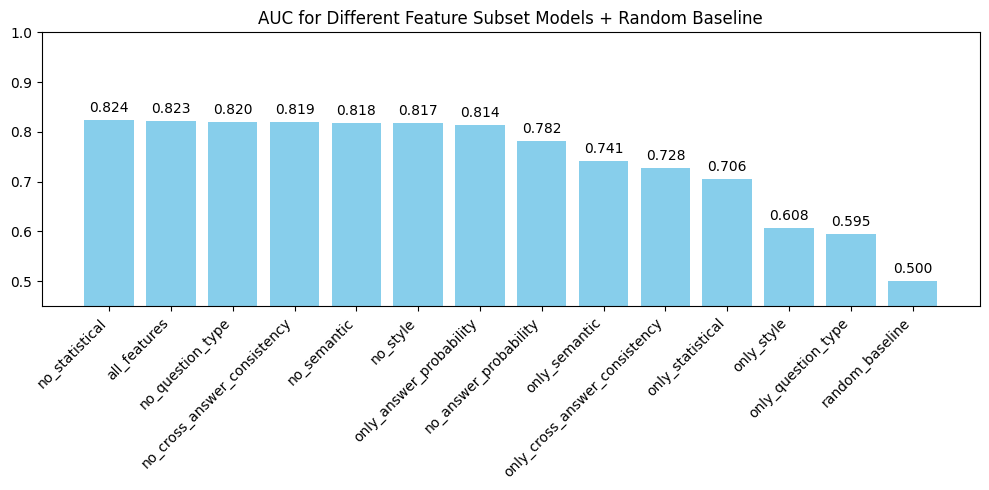

In [ ]:
# Sort the results by AUC for a clearer chart
if not FINAL_EVALUATION_MODE:
    sorted_results = sorted(experiment_results.items(), key=lambda x: x[1], reverse=True)
    labels = [item[0] for item in sorted_results]
    scores = [item[1] for item in sorted_results]

    plt.figure(figsize=(10, 5))
    bars = plt.bar(labels, scores, color='skyblue')
    plt.title("AUC for Different Feature Subset Models + Random Baseline")
    plt.xticks(rotation=45, ha="right")
    plt.ylim([0.45, 1])
    for bar in bars:
        yval = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2, yval + 0.01, f"{yval:.3f}", ha="center", va="bottom")
    plt.tight_layout()
    plt.show()

##### 7.6 Feature Importance Analysis for the "All Features" Model


Feature Importance for the 'All Features' model:
Top 10 Feature Importances:
                             Feature  Importance
44              [ansprob] answer_len    0.180633
49               [ansprob] other_len    0.155096
48               [ansprob] other_std    0.059691
42              [ansprob] answer_max    0.040077
41             [ansprob] answer_mean    0.029183
27        [cross] num_unique_answers    0.024370
24          [sem]   bow_unique_ratio    0.021126
28  [cross] most_common_answer_count    0.020210
43              [ansprob] answer_std    0.017266
40              [ansprob] answer_min    0.017071


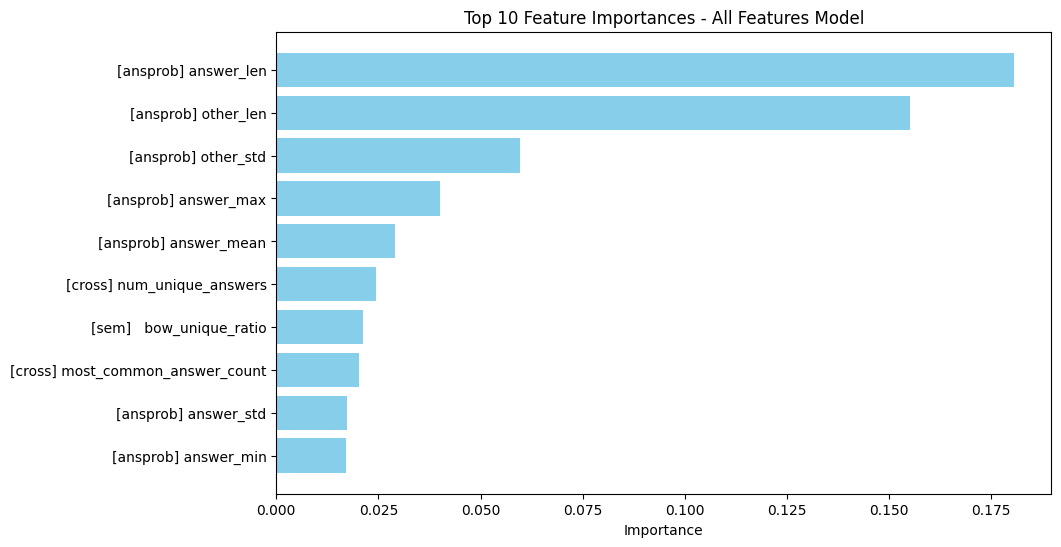

In [ ]:
if not FINAL_EVALUATION_MODE:
    print("\nFeature Importance for the 'All Features' model:")
    # 8A) Get final model's feature importances
    if isinstance(all_features_model, XGBClassifier):
        # Retrieve features from a sample for naming
        sample_feats = aggregator.aggregate_features(train_data[0], feature_sets="all")
        feature_names = list(sample_feats.keys())
        
        importances = all_features_model.feature_importances_
        
        # Build a DataFrame
        df_imp = pd.DataFrame({
            "Feature": feature_names,
            "Importance": importances
        }).sort_values("Importance", ascending=False)
        
        print("Top 10 Feature Importances:")
        print(df_imp.head(10))

        # 8B) Quick plot of top 10
        plt.figure(figsize=(10, 6))
        top10 = df_imp.head(10)[::-1]  # reverse for barh
        plt.barh(top10["Feature"], top10["Importance"], color='skyblue')
        plt.xlabel("Importance")
        plt.title("Top 10 Feature Importances - All Features Model")
        plt.show()
    else:
        print("[Notebook] All features model is not an XGBClassifier. Cannot display importances.")


## Ewaluacja

Kod bardzo podobny do poniższego będzie służył do ewaluacji rozwiązania na zdaniach testowych. Wywołując poniższe komórki możesz dowiedzieć się ile punktów zdobyłoby twoje rozwiązanie, gdybyśmy oceniali je na danych walidacyjnych. Przed wysłaniem rozwiązania upewnij się, że cały notebook wykonuje się od początku do końca bez błędów i bez ingerencji użytkownika po wykonaniu polecenia Run All.

In [23]:
######################### NIE ZMIENIAJ TEJ KOMÓRKI ##########################

def evaluate_algorithm(dataset, algorithm, verbose=False):
    """
    Evaluates a hallucination-detection algorithm on the given dataset.

    Parameters
    ----------
    dataset : list
        The labeled dataset, where each entry is a dict with 'is_correct'.
    algorithm : callable
        A function that takes a sample dict and returns a hallucination probability.
    verbose : bool
        If True, print extra info per sample and summary at the end.

    Returns
    -------
    roc_auc : float
        The area under the ROC curve for the predictions.
    balanced_acc : float
        The balanced accuracy (average of recall for each class).
    """
    predicted_ys = []

    for i, entry in enumerate(dataset):
        # Copy sample and remove label to form unlabeled input
        sample_unlabeled = dict(entry)
        sample_unlabeled.pop('is_correct', None)

        try:
            # 1. Predict probability for single sample
            pred_prob = algorithm(sample_unlabeled)
            predicted_ys.append(pred_prob)

        except Exception as e:
            # If there's an error, score zero or any default you prefer
            predicted_ys.append(0.5)
            if verbose:
                print(f"Sample {i} => Error: {e}")

    # Convert predictions and ground truth to numpy arrays
    predicted_ys = np.array(predicted_ys, dtype=np.float32)
    ys = extract_targets(dataset)

    # Compute metrics
    roc_auc = roc_auc_score(ys, predicted_ys)
    balanced_acc = balanced_accuracy_score(ys, (predicted_ys > 0.5).astype(int))

    if verbose:
        print(f"\nNumber of samples: {len(dataset)}")
        print(f"ROC AUC: {roc_auc:.4f}")
        print(f"Balanced Accuracy: {balanced_acc:.4f}")

    return roc_auc, balanced_acc

In [ ]:
# evaluate
if not FINAL_EVALUATION_MODE:
    roc_auc, balanced_acc = evaluate_algorithm(valid, predict_hallucinations, verbose=True)


Number of samples: 990
ROC AUC: 0.8226
Balanced Accuracy: 0.6975


In [37]:
test_path = os.path.join('data', 'test.json')

with open(test_path, 'r') as f:
    test = json.load(f)
# evaluate
if not FINAL_EVALUATION_MODE:
    roc_auc, balanced_acc = evaluate_algorithm(test, predict_hallucinations, verbose=True)


Number of samples: 990
ROC AUC: 0.8153
Balanced Accuracy: 0.7101
